In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
results = pd.read_csv('./../../../data_source/results/baseline_nofilter_sffs_40vals_10reps_dfs.csv', index_col=0)
results.head()

,exp_duration,exp_id,experiment_id,feature_votes,test_score,test_score_variance,train_score,train_score_variance
0,0 days 00:08:17.164633000,72,StudentTTestSelection_DTreeEstimator,[5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 0 0 0...,0.563604,0.003285,0.617035,0.000150
1,0 days 00:10:34.961865000,370,StudentTTestSelection_DTreeEstimator,[5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 4 5 5 5 5 3 4 2...,0.484544,0.012276,0.593987,0.000461
2,0 days 00:12:01.024077000,159,StudentTTestSelection_DTreeEstimator,[4 3 5 5 5 5 3 4 5 5 5 5 4 5 5 4 4 5 2 5 4 4 5...,0.608974,0.002561,0.764614,0.000233
3,0 days 00:09:19.561337000,805,StudentTTestSelection_DTreeEstimator,[4 4 5 3 4 5 4 4 2 4 4 4 4 5 2 4 4 4 5 4 2 2 3...,0.532407,0.010907,0.639681,0.000385
4,0 days 00:11:44.868641000,728,StudentTTestSelection_DTreeEstimator,[4 1 2 3 5 3 3 5 3 4 4 4 3 4 0 5 3 2 3 2 4 4 3...,0.495584,0.001928,0.836357,0.000210


In [3]:
results.shape

(80, 8)

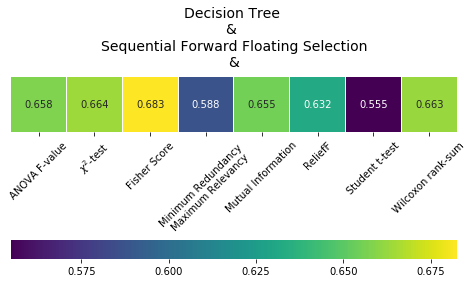

In [4]:
model_grps = results.groupby('experiment_id')
_avg_scores = model_grps['test_score'].mean()
_rows, _cols = zip(*list(map(lambda label: label.split('_'), _avg_scores.index)))
rows, cols = np.unique(_rows), np.unique(_cols)
avg_scores = model_grps['test_score'].mean().values.reshape(np.size(cols), np.size(rows))
std_scores = model_grps['test_score'].std().values.reshape(np.size(cols), np.size(rows))

model_name = 'Decision Tree \n& \nSequential Forward Floating Selection\n&'
selector_names = [
    'ANOVA F-value', r'$\chi^2$-test', 'Fisher Score',
    'Minimum Redundancy \nMaximum Relevancy', 
    'Mutual Information', 'ReliefF', 
    'Student t-test',
    'Wilcoxon rank-sum'
]
fig, (axis, cbar_axis) = plt.subplots(
    nrows=2, 
    gridspec_kw={'height_ratios': (1.5, 0.05), 'hspace': -0.5}, 
    figsize=(8, 8)
)
fig.subplots_adjust(wspace=0.0001)
sns.heatmap(
    avg_scores,
    #xticklabels=selector_names,  
    yticklabels='',
    vmin=np.nanmin(avg_scores) - 1e-4, 
    vmax=np.nanmax(avg_scores) + 1e-4,
    cmap=plt.cm.viridis, 
    robust=True,
    annot=True, 
    fmt='.3f', 
    square=1, 
    linewidth=.2, 
    ax=axis,
    cbar=True,
    cbar_ax=cbar_axis,
    cbar_kws={'shrink': 0.2, 'orientation': 'horizontal'},  
    
)
axis.set_xticklabels(selector_names, ha='center')
# Position the text.
axis.text(
    0.5, 1.7, 
    model_name, 
    transform=axis.transAxes, 
    fontsize=14,    
    va='center',
    ha='center'
)
axis.tick_params(rotation=45)
plt.savefig(
    './../../../figures/univariate_sffs_nofilter_dfs.png',
    bbox_inches='tight',
    transparent=True,
    dpi=600, 
)

In [5]:
std_scores

array([[0.04398334, 0.03640509, 0.0075932 , 0.0502699 , 0.03173189,
        0.02947428, 0.04764544, 0.03104509]])

In [ ]:
# TODO:
# * Create a graph with the number of features selected at univariate level and SFFS level in each outer CV loop.